In [ ]:
if(!require(psych)){install.packages("psych")}
if(!require(FSA)){install.packages("FSA")}
if(!require(Rmisc)){install.packages("Rmisc")}
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(car)){install.packages("car")}
if(!require(multcompView)){install.packages("multcompView")}
if(!require(multcomp)){install.packages("multcomp")}
if(!require(lsmeans)){install.packages("lsmeans")}
if(!require(rcompanion)){install.packages("rcompanion")}
if(!require(phia)){install.packages("phia")}

Loading required package: psych


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: FSA

Registered S3 methods overwritten by 'FSA':
  method       from
  confint.boot car 
  hist.boot    car 

## FSA v0.9.5. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.


Attaching package: ‘FSA’


The following object is masked from ‘package:psych’:

    headtail


The following object is masked from ‘package:car’:

    bootCase


Loading required package: Rmisc

Loading required package: lattice

Loading required package: plyr


Attaching package: ‘plyr’


The following object is masked from ‘package:FSA’:

    mapvalues


Loading required package: multcompView

Loading required package: multcomp

Loading required package: mvtnorm

Loading required package: survival

Loading required packag

In [ ]:
 Data = read.table("AllData.txt",
           header = TRUE,
           sep=';',
           colClasses=c('numeric','character','character','character','character'))

In [ ]:
Data$Scene = factor(Data$Scene,
                           levels=unique(Data$Scene))

Data$Accelerator = factor(Data$Accelerator,
                           levels=unique(Data$Accelerator))

Data$Integrator = factor(Data$Integrator,
                      levels=unique(Data$Integrator))

Data$OS = factor(Data$OS,
                      levels=unique(Data$OS))

In [ ]:
library (psych)
headTail(Data)
str(Data)
summary(Data)

,Time,Scene,Accelerator,Integrator,OS
,<chr>,<fct>,<fct>,<fct>,<fct>
1,35.6,teapot-metal,bvh,mlt,Debian-Virtual
2,254.6,teapot-metal,bvh,path,Debian-Virtual
3,38.5,teapot-metal,kdtree,mlt,Debian-Virtual
4,302.6,teapot-metal,kdtree,path,Debian-Virtual
...,...,NA,NA,NA,NA
397,6,caustic-proj,bvh,mlt,Linux
398,1.2,caustic-proj,bvh,path,Linux
399,6.5,caustic-proj,kdtree,mlt,Linux
400,1.5,caustic-proj,kdtree,path,Linux


'data.frame':	400 obs. of  5 variables:
 $ Time       : num  35.6 254.6 38.5 302.6 4 ...
 $ Scene      : Factor w/ 4 levels "teapot-metal",..: 1 1 1 1 2 2 2 2 3 3 ...
 $ Accelerator: Factor w/ 2 levels "bvh","kdtree": 1 1 2 2 1 1 2 2 1 1 ...
 $ Integrator : Factor w/ 2 levels "mlt","path": 1 2 1 2 1 2 1 2 1 2 ...
 $ OS         : Factor w/ 5 levels "Debian-Virtual",..: 1 1 1 1 1 1 1 1 1 1 ...


      Time                   Scene     Accelerator  Integrator
 Min.   :    1.00   teapot-metal:100   bvh   :200   mlt :200  
 1st Qu.:    3.00   room        :100   kdtree:200   path:200  
 Median :   17.05   glass       :100                          
 Mean   :  889.57   caustic-proj:100                          
 3rd Qu.:  145.50                                             
 Max.   :12022.60                                             
               OS    
 Debian-Virtual :80  
 Windows        :80  
 Linux-Virtual  :80  
 Windows-Virtual:80  
 Linux          :80  
                     

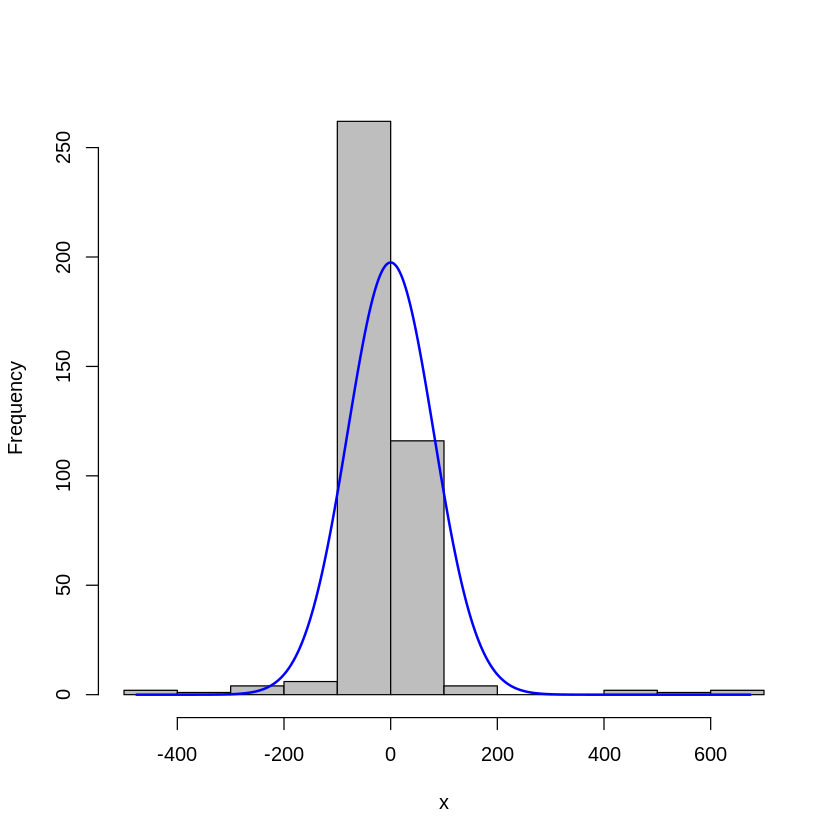

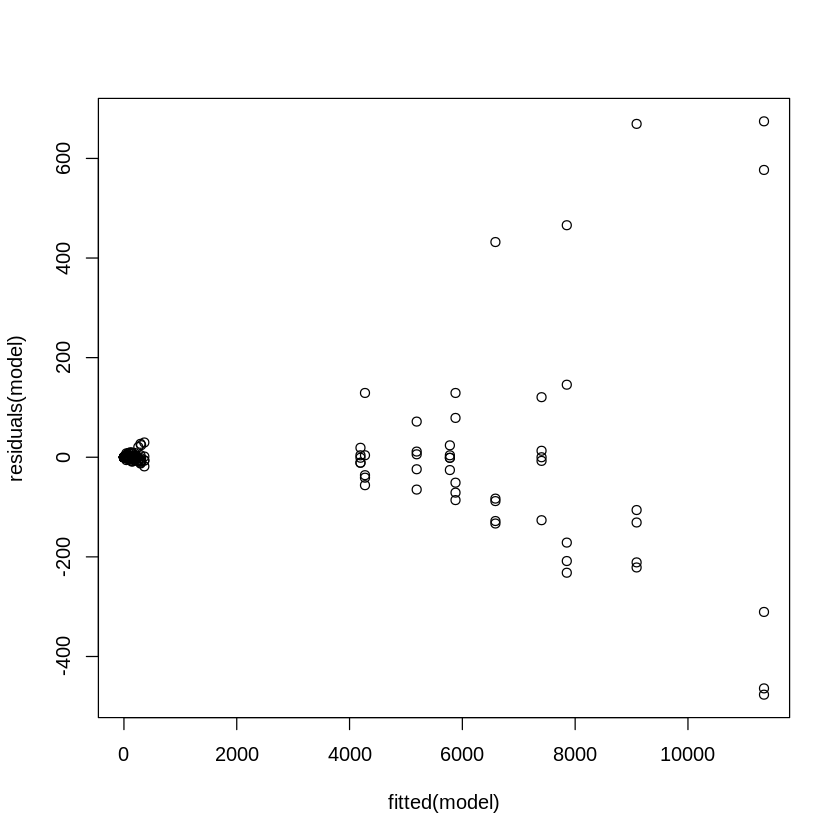

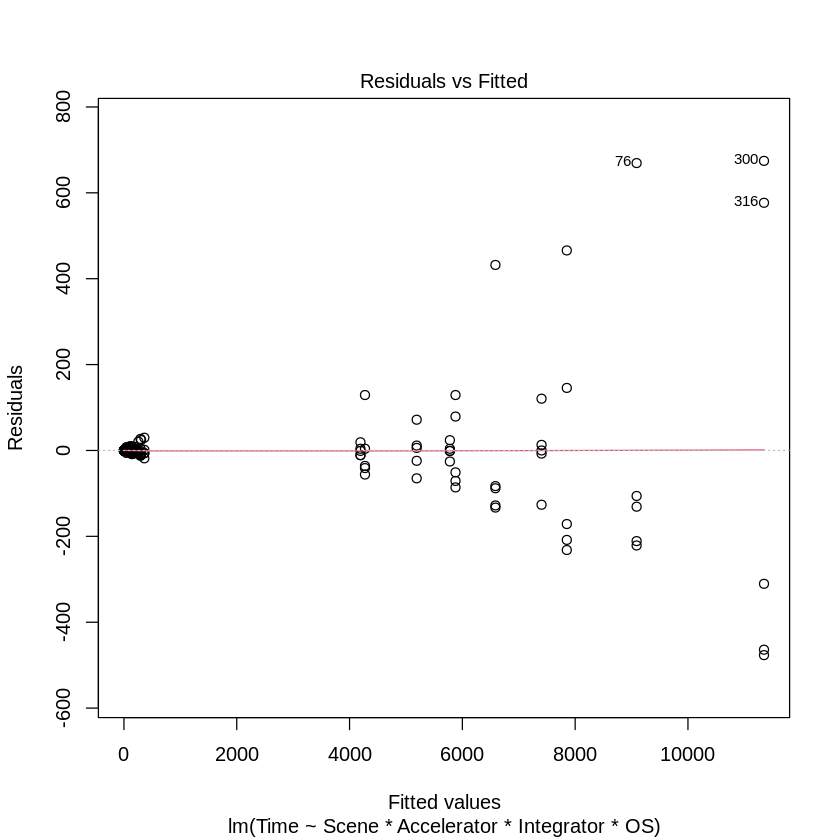

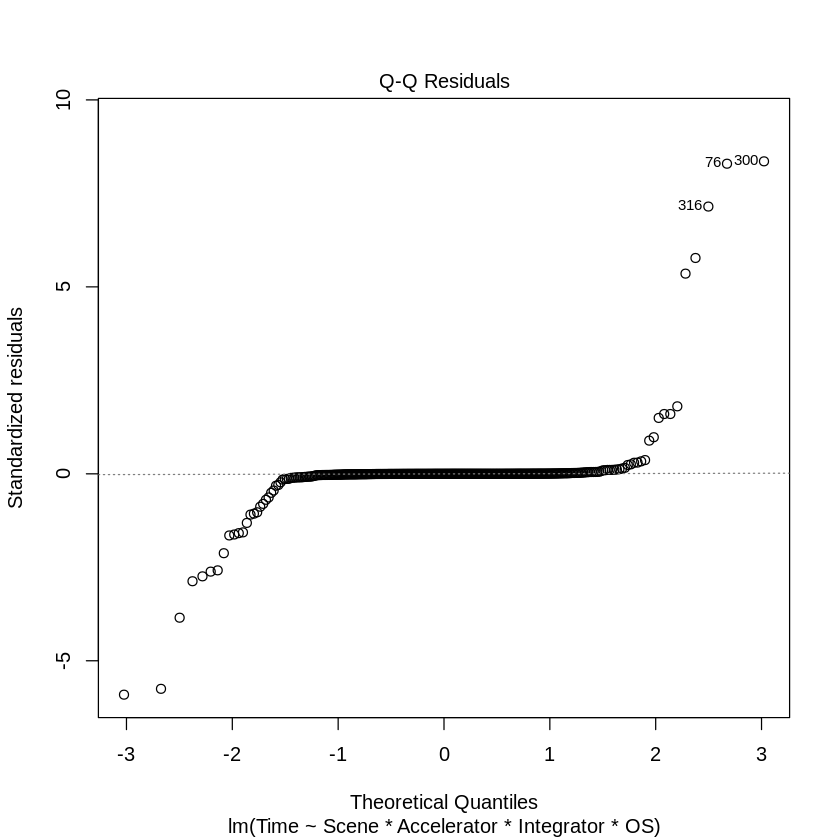

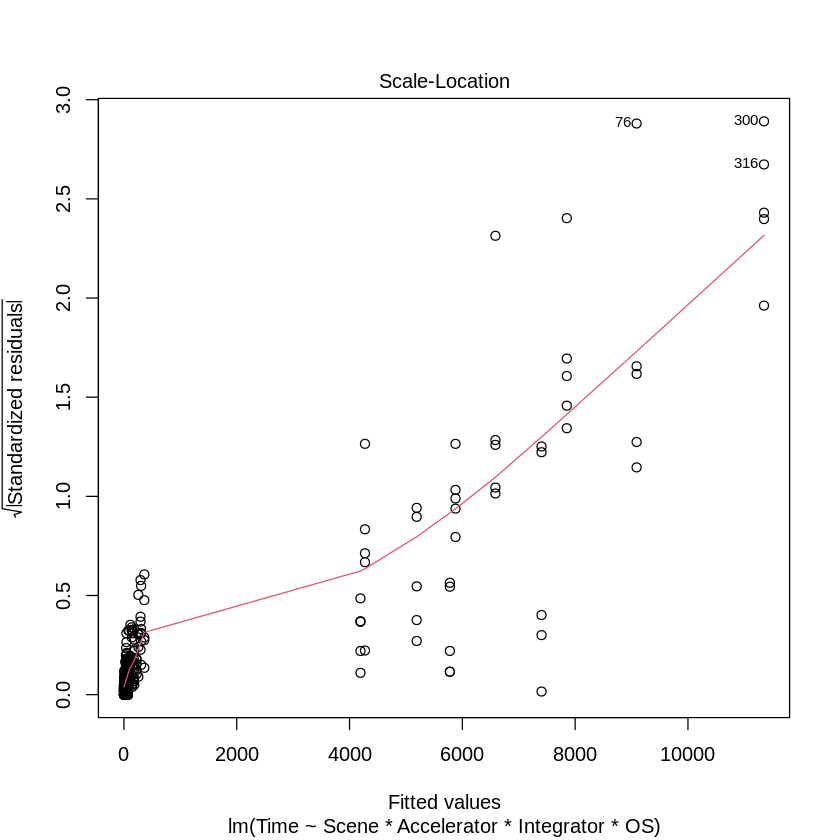

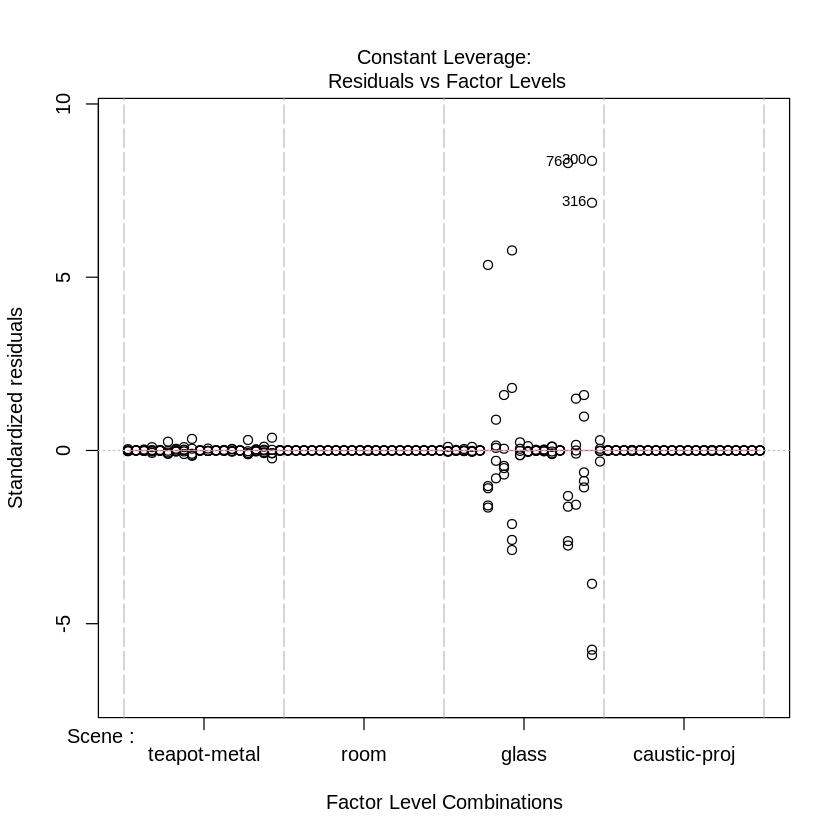

In [ ]:
model = lm(Time ~ Scene*Accelerator*Integrator*OS,
           data=Data)

library(car)

x = residuals(model)

library(rcompanion)
plotNormalHistogram(x)


plot(fitted(model),
     residuals(model))

plot(model)

In [ ]:
leveneTest(Time ~ Scene*Accelerator*Integrator*OS,
           data=Data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,3.072755,1.370551e-12
,320,NA,NA


Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  th

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Scene,1.269951e+05,3,1.794925e+05,0.000000e+00
Accelerator,4.936696e+02,1,2.093229e+03,1.940586e-142
Integrator,3.943097e+04,1,1.671929e+05,0.000000e+00
OS,1.498867e+03,4,1.588852e+03,1.239316e-209
Scene:Accelerator,1.011298e+03,3,1.429349e+03,6.328673e-185
Scene:Integrator,9.367033e+04,3,1.323918e+05,0.000000e+00
Accelerator:Integrator,2.719474e+02,1,1.153096e+03,4.063295e-108
Scene:OS,2.086642e+03,12,7.373049e+02,5.856771e-225
Accelerator:OS,1.476243e+01,4,1.564870e+01,1.046999e-11


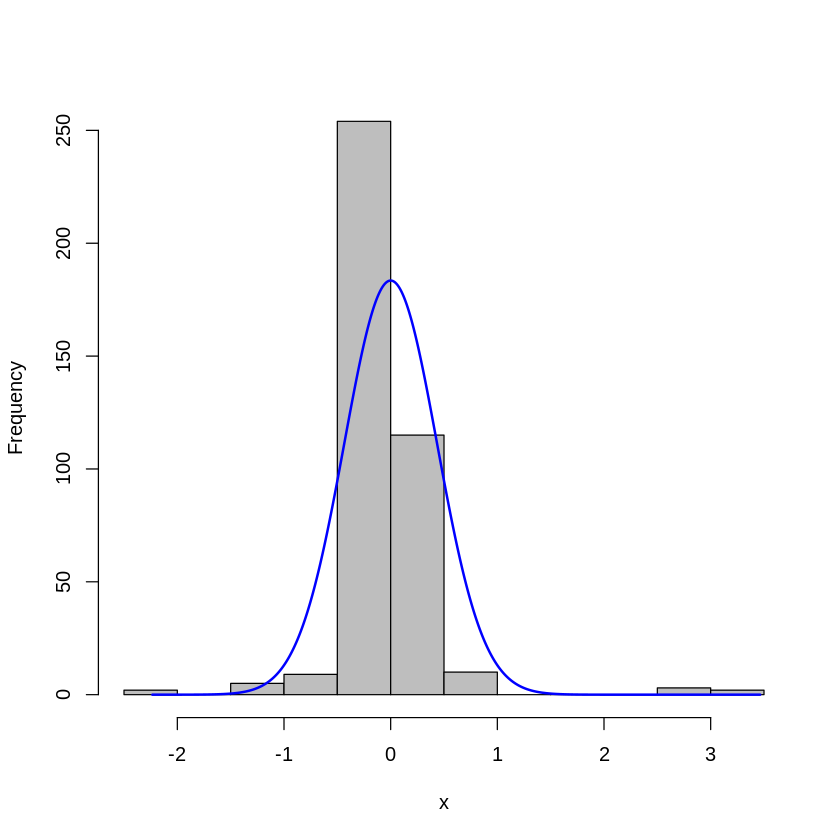

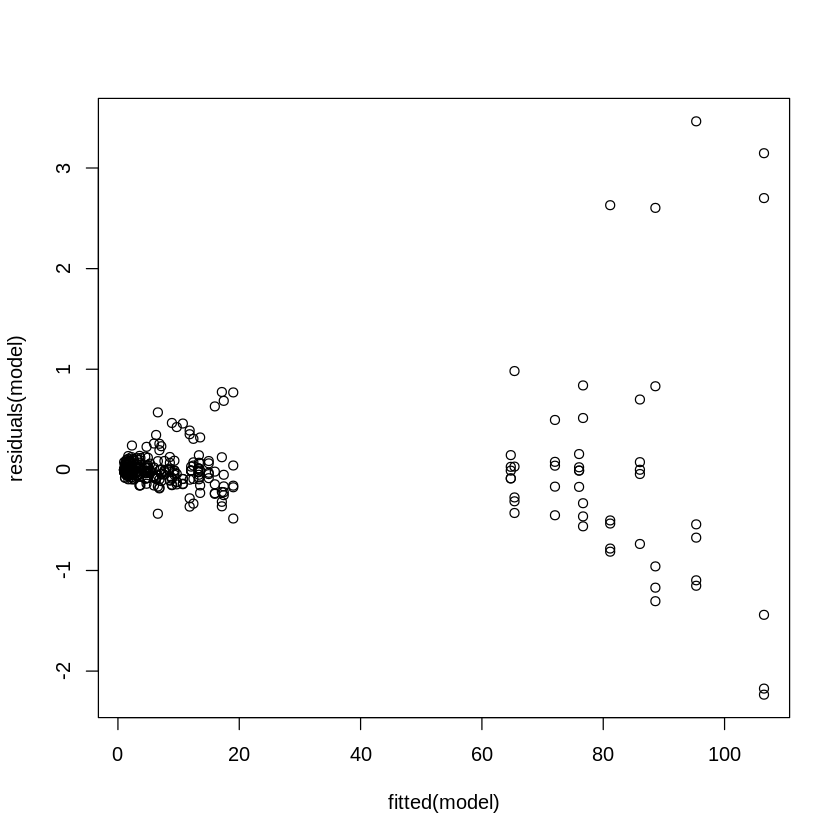

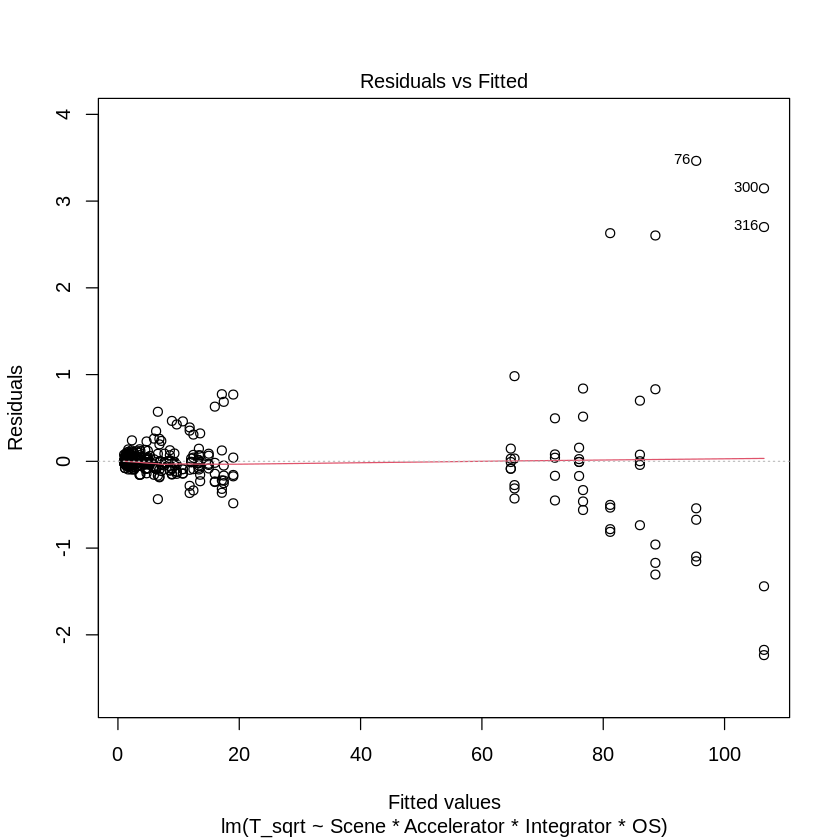

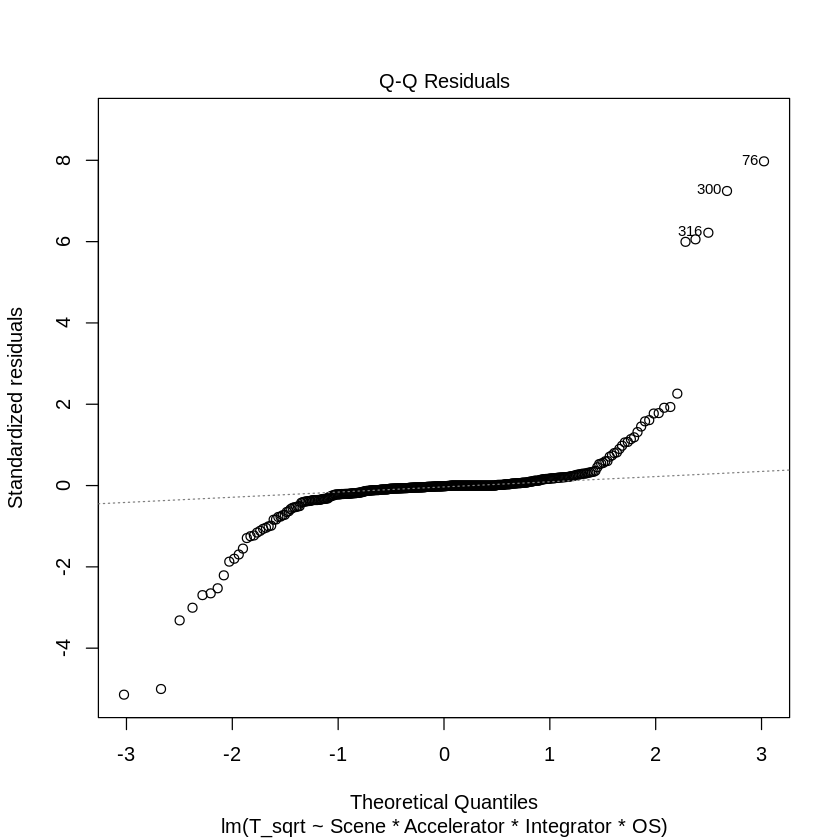

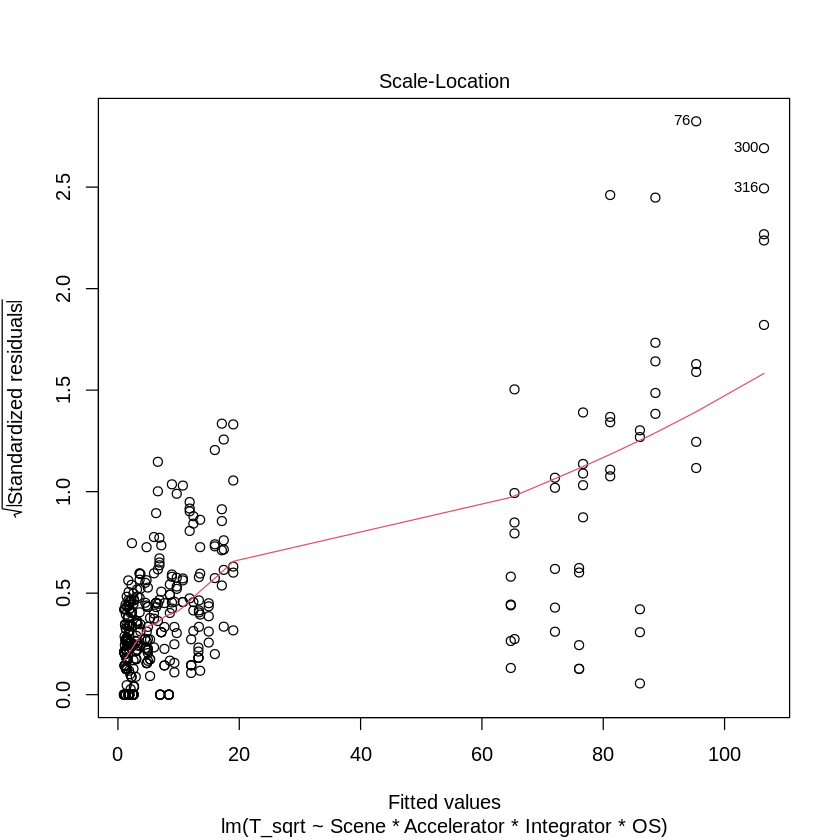

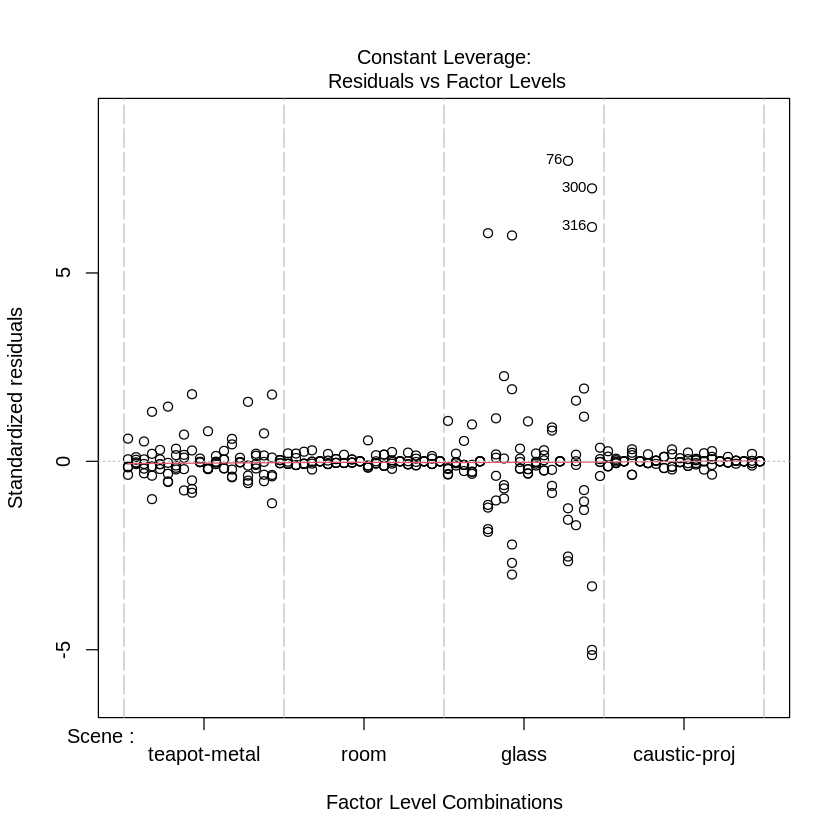

In [ ]:
T_sqrt = sqrt(Data$Time)

model = lm(T_sqrt ~ Scene*Accelerator*Integrator*OS,
           data=Data)

library(car)
Anova(model, type="II")

x = residuals(model)



library(rcompanion)
plotNormalHistogram(x)

plot(fitted(model),
     residuals(model))

plot(model)

In [ ]:
leveneTest(T_sqrt ~ Scene*Accelerator*Integrator*OS,
           data=Data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,2.588583,2.373164e-09
,320,NA,NA


Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  th

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Scene,6644.2894553,3,3.349868e+05,0.000000e+00
Accelerator,19.0721241,1,2.884692e+03,3.714573e-162
Integrator,1623.5528516,1,2.455652e+05,0.000000e+00
OS,70.1004242,4,2.650703e+03,7.664456e-244
Scene:Accelerator,26.7129527,3,1.346794e+03,4.356910e-181
Scene:Integrator,3815.0750620,3,1.923456e+05,0.000000e+00
Accelerator:Integrator,5.4734656,1,8.278712e+02,9.131905e-91
Scene:OS,48.9027013,12,6.163849e+02,5.320579e-213
Accelerator:OS,0.2994468,4,1.132296e+01,1.319648e-08


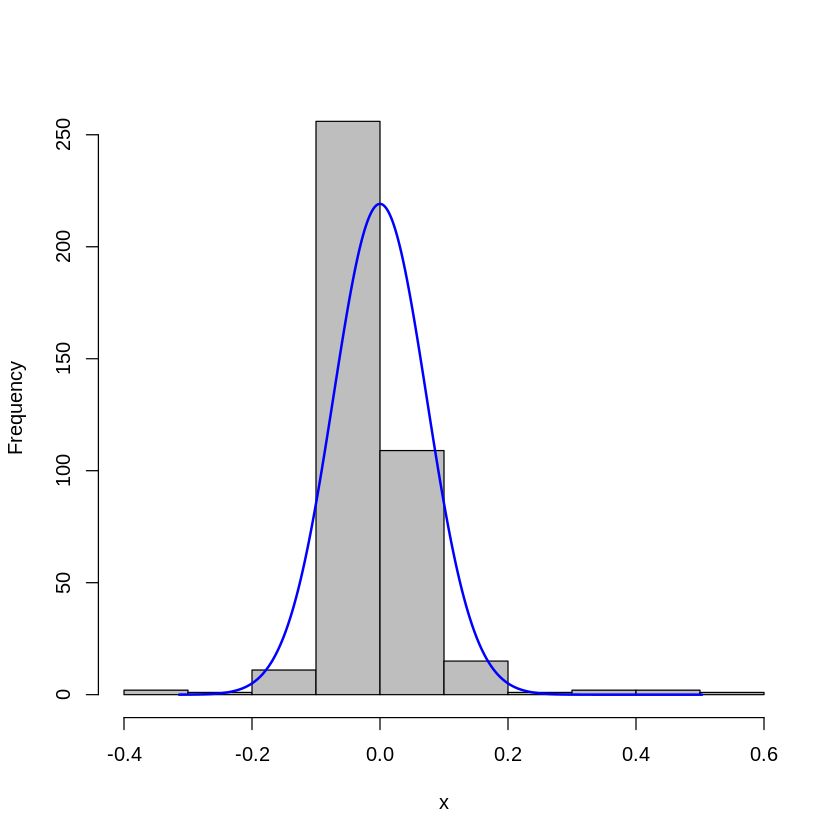

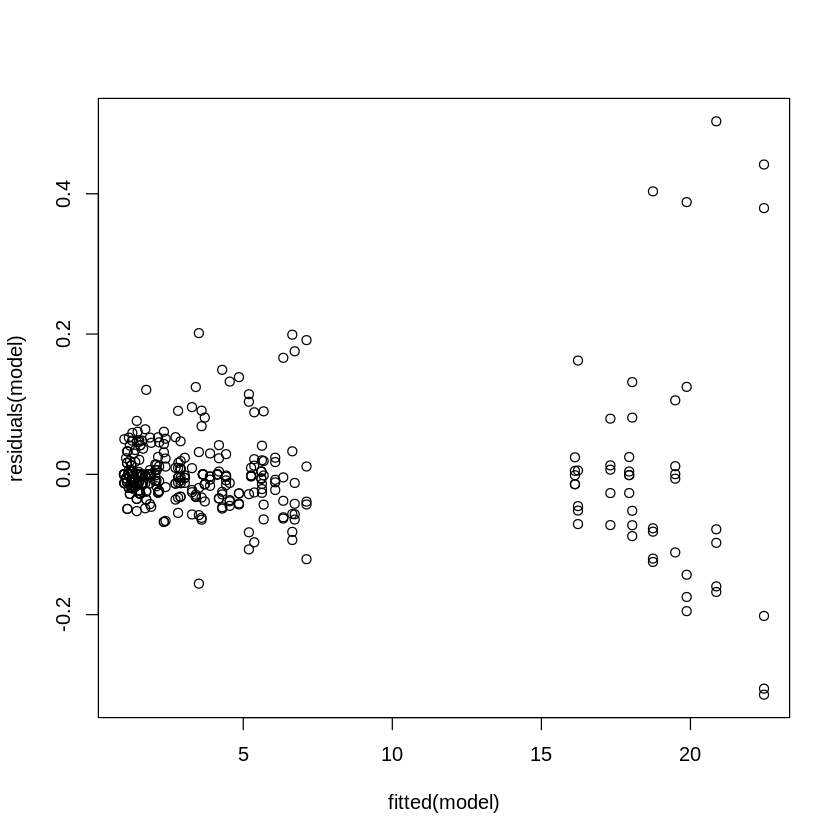

In [ ]:
library(rcompanion)

T_cub = sign(Data$Time) * abs(Data$Time)^(1/3)

model = lm(T_cub ~ Scene*Accelerator*Integrator*OS,
           data=Data)

library(car)
Anova(model, type="II")

x = residuals(model)

library(rcompanion)
plotNormalHistogram(x)


plot(fitted(model),
     residuals(model))

In [ ]:
leveneTest(T_cub ~ Scene*Accelerator*Integrator*OS,
           data=Data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,2.017595,1.085396e-05
,320,NA,NA


Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  the printed representation of the hypothesis will be omitted”
Warning message in printHypothesis(L, rhs, names(b)):
“one or more coefficients in the hypothesis include
     arithmetic operators in their names;
  th

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Scene,2.099117e+03,3,2.953034e+05,0.000000e+00
Accelerator,4.858851e+00,1,2.050626e+03,3.358955e-141
Integrator,9.810187e+01,1,4.140285e+04,0.000000e+00
OS,2.707265e+01,4,2.856431e+03,6.888618e-249
Scene:Accelerator,9.847533e-01,3,1.385349e+02,1.561243e-57
Scene:Integrator,5.706821e+02,3,8.028343e+04,0.000000e+00
Accelerator:Integrator,8.200563e-02,1,3.460960e+01,1.015160e-08
Scene:OS,6.215478e-01,12,2.185980e+01,4.624457e-35
Accelerator:OS,9.300128e-03,4,9.812549e-01,4.178662e-01


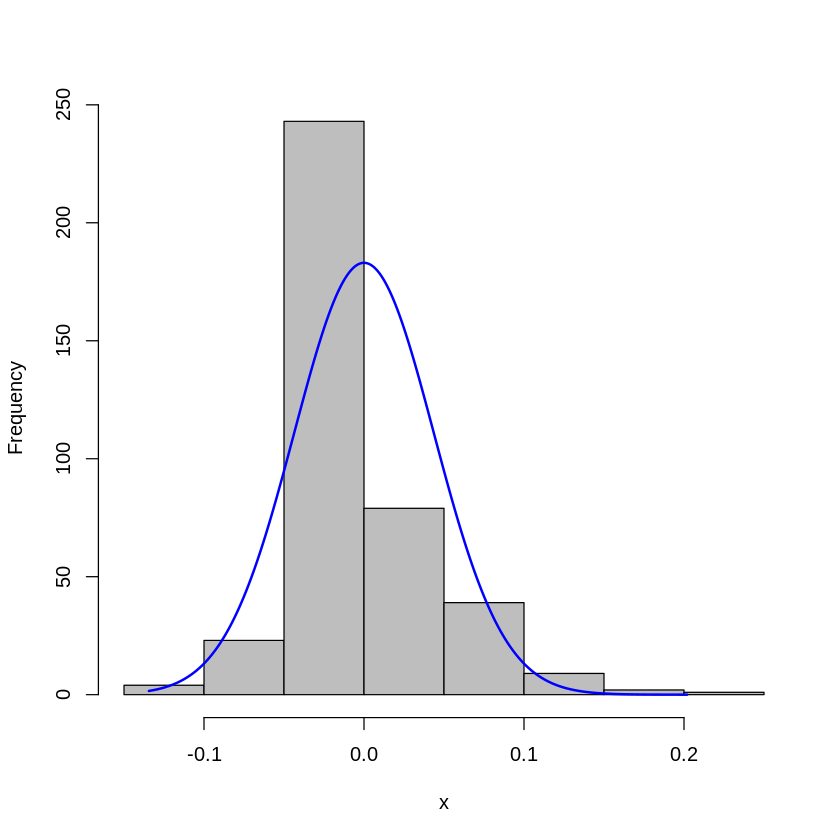

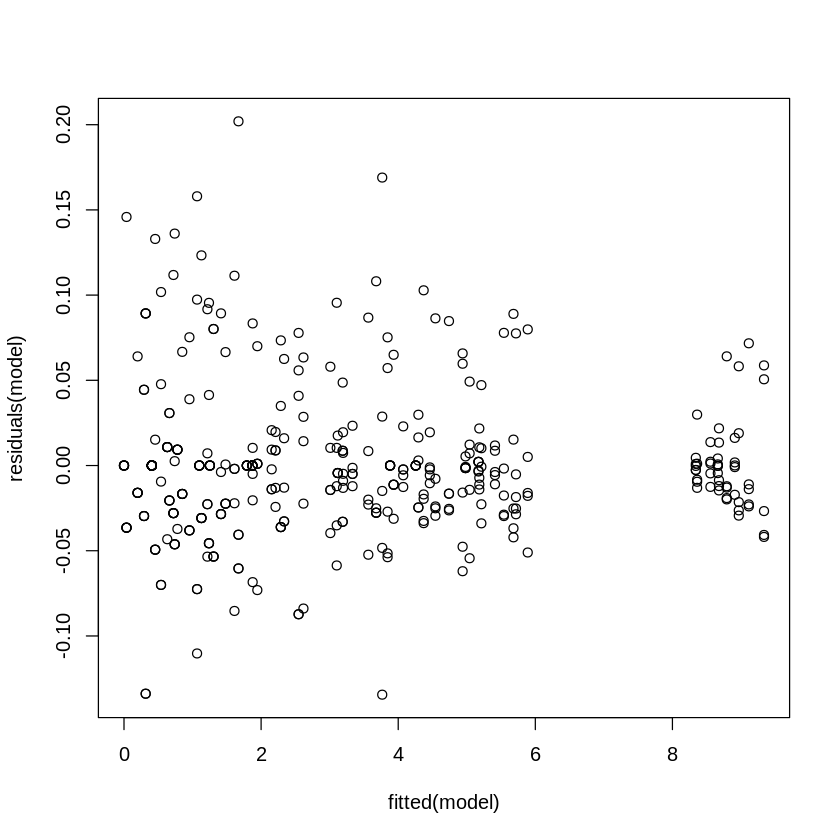

In [ ]:
library(rcompanion)

T_log = log(Data$Time)

model = lm(T_log ~ Scene*Accelerator*Integrator*OS,
           data=Data)

library(car)
Anova(model, type="II")

x = residuals(model)

library(rcompanion)
plotNormalHistogram(x)


plot(fitted(model),
     residuals(model))

In [ ]:
leveneTest(T_log ~ Scene*Accelerator*Integrator*OS,
           data=Data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,79,1.151895,0.199975
,320,NA,NA


$title
[1] "Time vs Operating System"

attr(,"class")
[1] "labels"

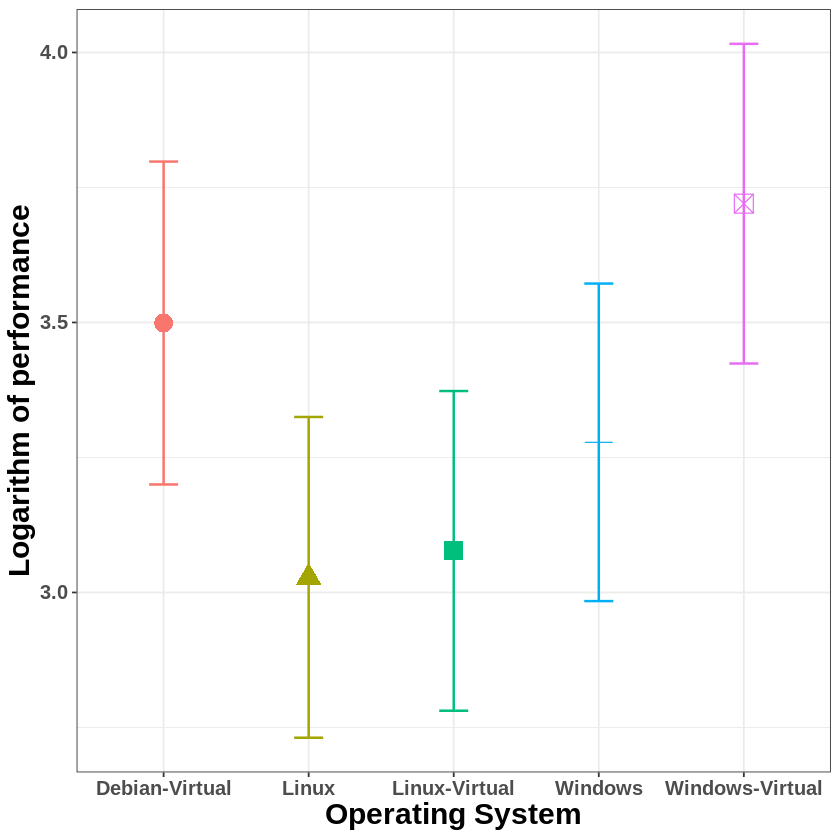

In [ ]:
library(FSA)

Sum = Summarize(T_log ~ OS,
                data=Data,
                digits=3)

Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits = 3)

library(ggplot2)

pd=position_dodge(.2)
ggplot(Sum, aes(x=OS, y=mean, color=OS)) +
  geom_errorbar(aes(ymin = mean - se, ymax=mean + se),width=.2, size=0.7, position = pd) +
  geom_point(aes(shape=OS), size=5, position = pd) +
  theme_bw() + theme(plot.title = element_text(face = 'bold', size=18, hjust = 0.5),
                     axis.title = element_text(face = 'bold', size=18),
                     axis.text = element_text(face = 'bold', size=12),
                     legend.text = element_text(face = 'bold', size=15),
                     legend.title = element_text(face = 'bold', size=20),
                     legend.position = "none") + ylab("Logarithm of performance") + xlab("Operating System")
  ggtitle("Time vs Operating System")


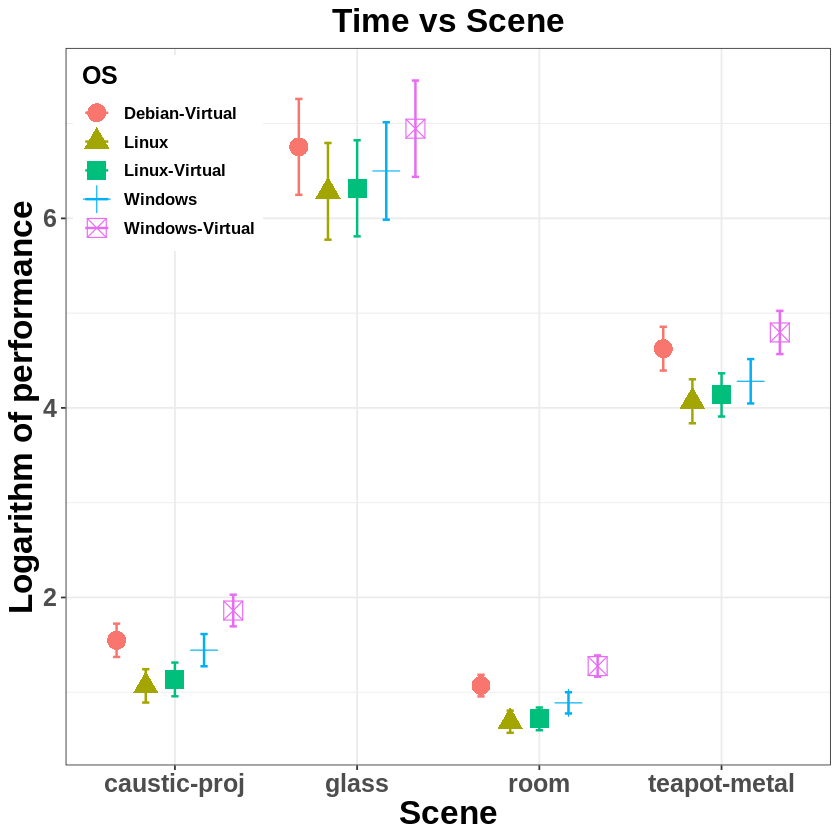

In [ ]:
library(FSA)

Sum = Summarize(T_log ~ OS + Scene,
                data=Data,
                digits=3)

Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits = 3)


library(ggplot2)
pd=position_dodge(.8)
ggplot(Sum, aes(x=Scene, y=mean, color=OS)) +
  geom_errorbar(aes(ymin = mean - se, ymax=mean + se),width=.2, size=0.7, position = pd) +
  geom_point(aes(shape=OS), size=5, position = pd) +
  theme_bw() + theme(plot.title = element_text(face = 'bold', size=20, hjust = 0.5),
                     axis.title = element_text(face = 'bold', size=20),
                     axis.text = element_text(face = 'bold', size=15),
                     plot.caption = element_text(hjust=0),
                     legend.text = element_text(face = 'bold', size=10),
                     legend.title = element_text(face = 'bold', size=15),
                     legend.justification = c(0,1),
                     legend.position = c(0.01,0.99)) + xlab("Scene") + ylab("Logarithm of performance") +
  ggtitle("Time vs Scene")

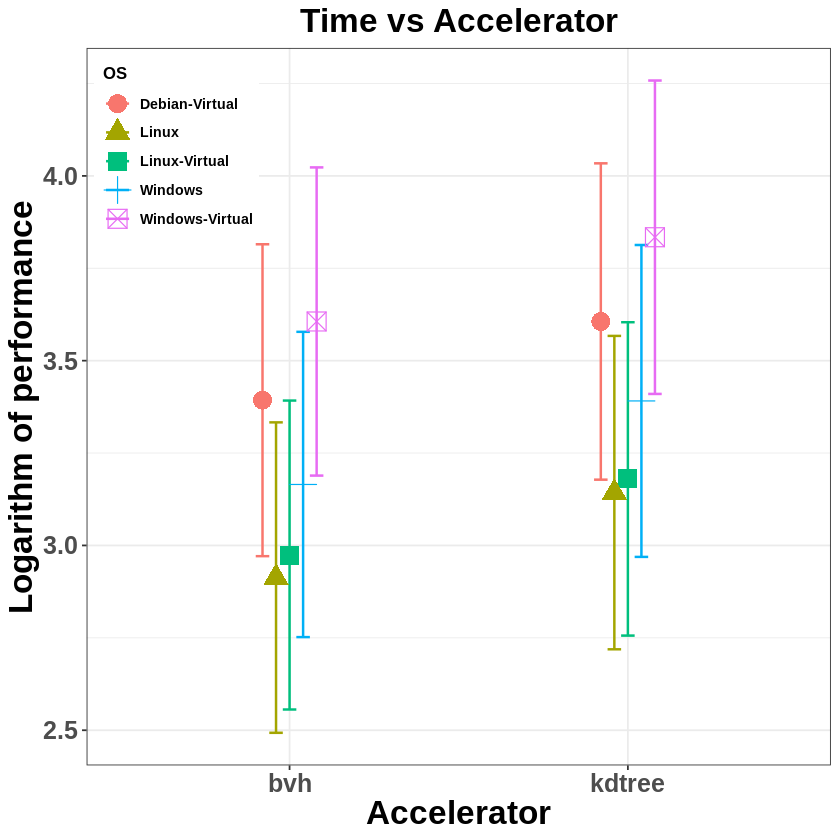

In [ ]:
library(FSA)

Sum = Summarize(T_log ~ OS + Accelerator,
                data=Data,
                digits=3)

Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits = 3)


library(ggplot2)
pd=position_dodge(.2)
ggplot(Sum, aes(x=Accelerator, y=mean, color=OS)) +
  geom_errorbar(aes(ymin = mean - se, ymax=mean + se),width=.2, size=0.7, position = pd) +
  geom_point(aes(shape=OS), size=5, position = pd) +
  theme_bw() + theme(plot.title = element_text(face = 'bold', size=20, hjust = 0.5),
                     axis.title = element_text(face = 'bold', size=20),
                     axis.text = element_text(face = 'bold', size=15),
                     plot.caption = element_text(hjust=0),
                     legend.text = element_text(face = 'bold', size=8.5),
                     legend.title = element_text(face = 'bold', size=10),
                     legend.justification = c(0,1),
                     legend.position = c(0.01,0.99)) + xlab("Accelerator") + ylab("Logarithm of performance") +
  ggtitle("Time vs Accelerator")

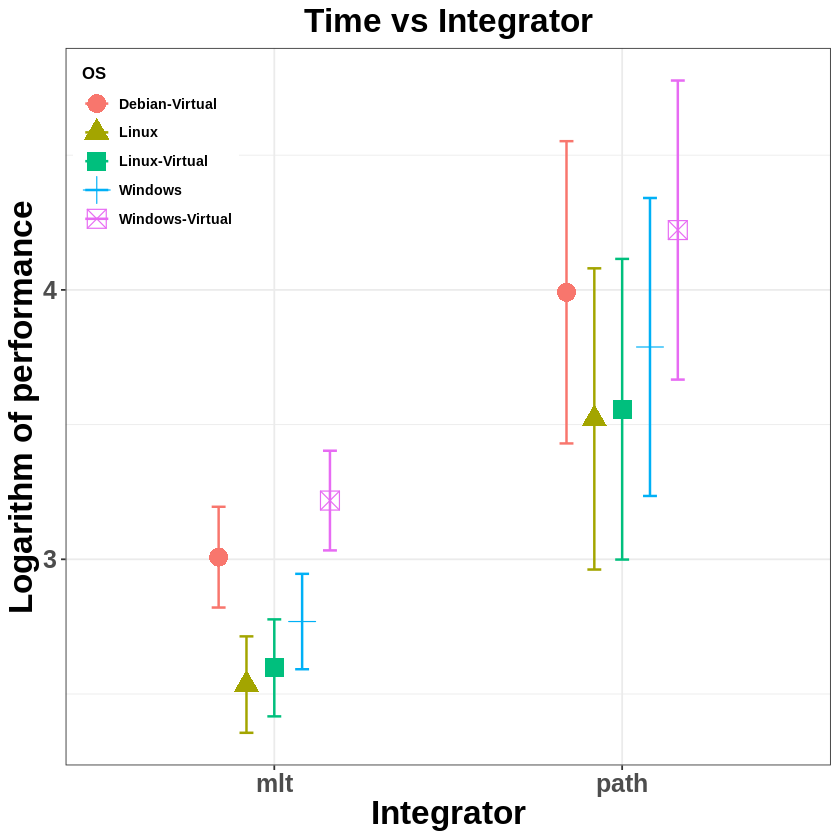

In [ ]:
library(FSA)

Sum = Summarize(T_log ~ OS + Integrator,
                data=Data,
                digits=3)

Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits = 3)


library(ggplot2)
pd=position_dodge(.4)
ggplot(Sum, aes(x=Integrator, y=mean, color=OS)) +
  geom_errorbar(aes(ymin = mean - se, ymax=mean + se),width=.2, size=0.7, position = pd) +
  geom_point(aes(shape=OS), size=5, position = pd) +
  theme_bw() + theme(plot.title = element_text(face = 'bold', size=20, hjust = 0.5),
                     axis.title = element_text(face = 'bold', size=20),
                     axis.text = element_text(face = 'bold', size=15),
                     plot.caption = element_text(hjust=0),
                     legend.text = element_text(face = 'bold', size=8.5),
                     legend.title = element_text(face = 'bold', size=10),
                     legend.justification = c(0,1),
                     legend.position = c(0.01,0.99)) + xlab("Integrator") + ylab("Logarithm of performance") +
  ggtitle("Time vs Integrator")

In [ ]:
pairwise.t.test(T_log, Data$OS, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  T_log and Data$OS 

                Debian-Virtual Windows Linux-Virtual Windows-Virtual
Windows         0.70           -       -             -              
Linux-Virtual   0.63           0.70    -             -              
Windows-Virtual 0.70           0.63    0.63          -              
Linux           0.63           0.70    0.91          0.63           

P value adjustment method: BH 

In [ ]:
pairwise.t.test(T_log, Data$Accelerator, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  T_log and Data$Accelerator 

       bvh 
kdtree 0.41

P value adjustment method: BH 

In [ ]:
pairwise.t.test(T_log, Data$Integrator, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  T_log and Data$Integrator 

     mlt    
path 0.00017

P value adjustment method: BH 

In [ ]:
pairwise.t.test(T_log, Data$Scene, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  T_log and Data$Scene 

             teapot-metal room   glass 
room         <2e-16       -      -     
glass        <2e-16       <2e-16 -     
caustic-proj <2e-16       0.011  <2e-16

P value adjustment method: BH 

In [ ]:
pairwise.t.test(T_log, Data$OS:Data$Scene, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  T_log and Data$OS:Data$Scene 

                             Debian-Virtual:teapot-metal Debian-Virtual:room
Debian-Virtual:room          2.2e-15                     -                  
Debian-Virtual:glass         1.1e-06                     < 2e-16            
Debian-Virtual:caustic-proj  4.1e-12                     0.32778            
Windows:teapot-metal         0.48012                     5.3e-13            
Windows:room                 < 2e-16                     0.71604            
Windows:glass                1.8e-05                     < 2e-16            
Windows:caustic-proj         8.2e-13                     0.44348            
Linux-Virtual:teapot-metal   0.31986                     4.7e-12            
Linux-Virtual:room           < 2e-16                     0.47692            
Linux-Virtual:glass          0.00011                     < 2e-16            
Linux-Virtual:caustic-proj   6.3e-15                     0.89

In [ ]:
pairwise.t.test(T_log, Data$OS:Data$Integrator, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  T_log and Data$OS:Data$Integrator 

                     Debian-Virtual:mlt Debian-Virtual:path Windows:mlt
Debian-Virtual:path  0.30               -                   -          
Windows:mlt          0.78               0.21                -          
Windows:path         0.44               0.78                0.30       
Linux-Virtual:mlt    0.66               0.16                0.81       
Linux-Virtual:path   0.60               0.65                0.44       
Windows-Virtual:mlt  0.78               0.44                0.65       
Windows-Virtual:path 0.21               0.78                0.15       
Linux:mlt            0.65               0.15                0.78       
Linux:path           0.64               0.65                0.45       
                     Windows:path Linux-Virtual:mlt Linux-Virtual:path
Debian-Virtual:path  -            -                 -                 
Windows:mlt          -            -      

In [ ]:
pairwise.t.test(T_log, Data$Scene:Data$Accelerator, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  T_log and Data$Scene:Data$Accelerator 

                    teapot-metal:bvh teapot-metal:kdtree room:bvh room:kdtree
teapot-metal:kdtree 0.596            -                   -        -          
room:bvh            < 2e-16          < 2e-16             -        -          
room:kdtree         < 2e-16          < 2e-16             0.338    -          
glass:bvh           9.7e-14          3.9e-12             < 2e-16  < 2e-16    
glass:kdtree        < 2e-16          4.2e-16             < 2e-16  < 2e-16    
caustic-proj:bvh    < 2e-16          < 2e-16             0.045    0.301      
caustic-proj:kdtree < 2e-16          < 2e-16             0.017    0.163      
                    glass:bvh glass:kdtree caustic-proj:bvh
teapot-metal:kdtree -         -            -               
room:bvh            -         -            -               
room:kdtree         -         -            -               
glass:bvh           -         -    

In [ ]:
pairwise.t.test(T_log, Data$Scene:Data$Integrator, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  T_log and Data$Scene:Data$Integrator 

                  teapot-metal:mlt teapot-metal:path room:mlt room:path
teapot-metal:path < 2e-16          -                 -        -        
room:mlt          < 2e-16          < 2e-16           -        -        
room:path         < 2e-16          < 2e-16           < 2e-16  -        
glass:mlt         < 2e-16          < 2e-16           < 2e-16  < 2e-16  
glass:path        < 2e-16          < 2e-16           < 2e-16  < 2e-16  
caustic-proj:mlt  < 2e-16          < 2e-16           < 2e-16  < 2e-16  
caustic-proj:path < 2e-16          < 2e-16           < 2e-16  0.00047  
                  glass:mlt glass:path caustic-proj:mlt
teapot-metal:path -         -          -               
room:mlt          -         -          -               
room:path         -         -          -               
glass:mlt         -         -          -               
glass:path        < 2e-16   -          -    

In [ ]:
pairwise.t.test(T_log, Data$Accelerator:Data$Integrator, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  T_log and Data$Accelerator:Data$Integrator 

            bvh:mlt bvh:path kdtree:mlt
bvh:path    0.0191  -        -         
kdtree:mlt  0.6038  0.0565   -         
kdtree:path 0.0068  0.6004   0.0181    

P value adjustment method: BH 

In [ ]:
pairwise.t.test(T_log, Data$Scene:Data$Accelerator:Data$Integrator, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  T_log and Data$Scene:Data$Accelerator:Data$Integrator 

                         teapot-metal:bvh:mlt teapot-metal:bvh:path
teapot-metal:bvh:path    < 2e-16              -                    
teapot-metal:kdtree:mlt  0.17744              < 2e-16              
teapot-metal:kdtree:path < 2e-16              0.01261              
room:bvh:mlt             < 2e-16              < 2e-16              
room:bvh:path            < 2e-16              < 2e-16              
room:kdtree:mlt          < 2e-16              < 2e-16              
room:kdtree:path         < 2e-16              < 2e-16              
glass:bvh:mlt            < 2e-16              < 2e-16              
glass:bvh:path           < 2e-16              < 2e-16              
glass:kdtree:mlt         < 2e-16              < 2e-16              
glass:kdtree:path        < 2e-16              < 2e-16              
caustic-proj:bvh:mlt     < 2e-16              < 2e-16              

In [ ]:
pairwise.t.test(T_log, Data$OS:Data$Scene:Data$Accelerator:Data$Integrator, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  T_log and Data$OS:Data$Scene:Data$Accelerator:Data$Integrator 

                                         Debian-Virtual:teapot-metal:bvh:mlt
Debian-Virtual:teapot-metal:bvh:path     < 2e-16                            
Debian-Virtual:teapot-metal:kdtree:mlt   0.00024                            
Debian-Virtual:teapot-metal:kdtree:path  < 2e-16                            
Debian-Virtual:room:bvh:mlt              < 2e-16                            
Debian-Virtual:room:bvh:path             < 2e-16                            
Debian-Virtual:room:kdtree:mlt           < 2e-16                            
Debian-Virtual:room:kdtree:path          < 2e-16                            
Debian-Virtual:glass:bvh:mlt             < 2e-16                            
Debian-Virtual:glass:bvh:path            < 2e-16                            
Debian-Virtual:glass:kdtree:mlt          < 2e-16                            
Debian-Virtual:glass:kdtree: